<a href="https://colab.research.google.com/github/eildes06/Machine-Learning/blob/main/DL_Assignment_3_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time)_Emine_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/Frozen_Dessert_Production.csv',index_col='DATE', parse_dates = True)
#df=drive.mount('/content/Frozen_Dessert_Production.csv', index_col='date', parse_dates = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [5]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [6]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPN31152N,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


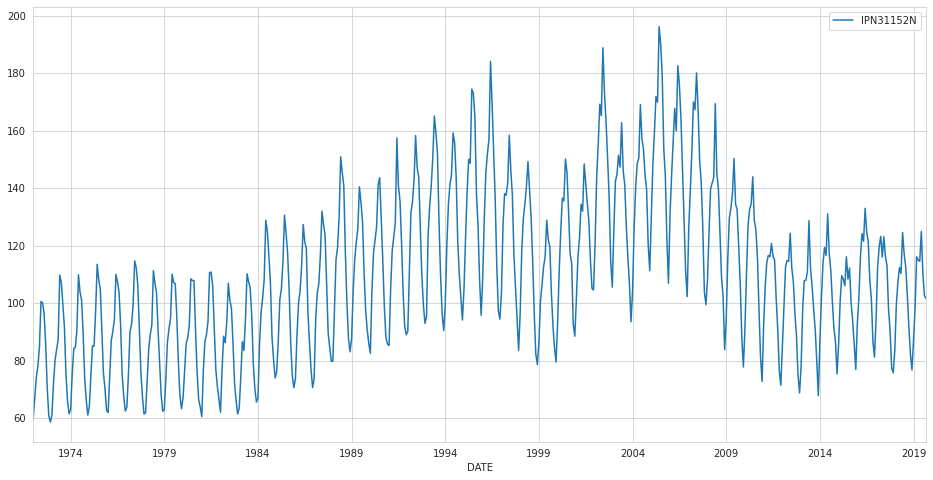

In [8]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [9]:
len(df)

573

In [10]:
test_months = 24

In [11]:
test_ind = len(df)- test_months
test_ind

549

In [12]:
test_ind 

549

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
len(train), len(test)

(549, 24)

In [14]:
train.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [15]:
test.head()

,IPN31152N
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490


## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
df.columns

Index(['IPN31152N'], dtype='object')

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, 
                                train_scaled, 
                                length = length, 
                                batch_size = batch_size)

In [22]:
len(generator)

537

In [23]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [24]:
X, y = generator[0]

In [25]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## with "tanh" activation function

In [27]:
train_scaled.shape

(549, 1)

In [28]:
n_features = train_scaled.shape[1]

In [29]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [33]:
validation_generator = TimeseriesGenerator(test_scaled, 
                                           test_scaled, 
                                           length = length, 
                                           batch_size = batch_size)

In [34]:
len(validation_generator)  

12

In [35]:
model.fit_generator(generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
537/537 [==============================] - 11s 7ms/step - loss: 0.0191 - val_loss: 0.0029
Epoch 2/20
537/537 [==============================] - 3s 6ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 3/20
537/537 [==============================] - 3s 5ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 4/20
537/537 [==============================] - 3s 5ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 5/20
537/537 [==============================] - 3s 5ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 6/20
537/537 [==============================] - 3s 5ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 7/20
537/537 [==============================] - 3s 5ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 8/20
537/537 [==============================] - 3s 5ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 9/20
537/537 [==============================] - 3s 5ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 10/20
537/537 [==============================] - 3s 5ms/step - loss: 0.0033 - val_loss: 0.002

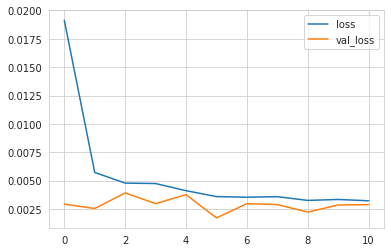

In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [38]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [39]:
y_pred = model.predict(validation_generator) 

y_pred

array([[0.2241343 ],
       [0.1767956 ],
       [0.17002901],
       [0.19401374],
       [0.26132601],
       [0.33767575],
       [0.4245154 ],
       [0.4610682 ],
       [0.45272854],
       [0.42861268],
       [0.34854394],
       [0.2519201 ]], dtype=float32)

In [40]:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.8434428410591064 
 mae: 0.03510825665643628 
 mse: 0.001710803511690397 
 rmse: 0.04136186059270541


In [41]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

### Inverse Transformation and Comparing

In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

In [43]:
test['Predictions'] = true_predictions

In [44]:
test

,IPN31152N,Predictions
DATE,,
2017-10-01,90.473,90.997
2017-11-01,77.438,87.253
2017-12-01,75.812,90.353
2018-01-01,83.434,98.064
2018-02-01,99.490,106.699
2018-03-01,107.315,114.017
2018-04-01,112.431,119.245
2018-05-01,110.354,121.398
2018-06-01,124.584,120.388


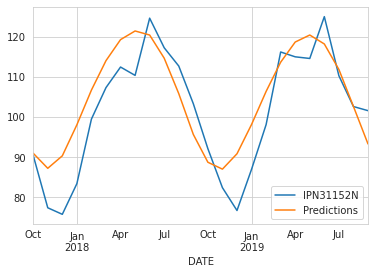

In [45]:
test.plot();

## with "relu" activation function

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

n_features = 1

model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features))) 
model.add(Dense(1))  
model.compile(optimizer = 'adam', loss = 'mse')

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [49]:
validation_generator = TimeseriesGenerator(test_scaled,
                                           test_scaled,
                                           length=length,
                                           batch_size=1)

In [50]:
len(validation_generator)

12

In [51]:
model.fit_generator(generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
537/537 [==============================] - 15s 24ms/step - loss: 0.0241 - val_loss: 0.0076
Epoch 2/20
537/537 [==============================] - 16s 29ms/step - loss: 0.0076 - val_loss: 0.0028
Epoch 3/20
537/537 [==============================] - 12s 22ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 4/20
537/537 [==============================] - 12s 22ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 5/20
537/537 [==============================] - 12s 22ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 6/20
537/537 [==============================] - 12s 22ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 7/20
537/537 [==============================] - 12s 21ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 8/20
537/537 [==============================] - 12s 21ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/20
537/537 [==============================] - 13s 24ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 10/20
537/537 [==============================] - 12s 23ms/step - loss: 0.003

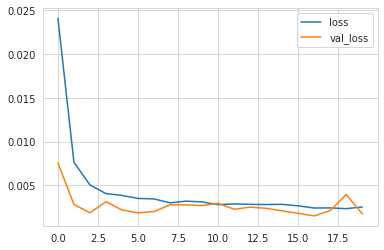

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [53]:
test_predictions = []

first_eval_batch = train_scaled[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [54]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.7275908710074559 
 mae: 0.04929054096270539 
 mse: 0.003188186759417196 
 rmse: 0.05646403066924284


### Inverse Transformation and Comparing

In [55]:
true_predictions = scaler.inverse_transform(test_predictions)

In [56]:
test['Predictions'] = true_predictions
test

,IPN31152N,Predictions
DATE,,
2017-10-01,90.473,91.296
2017-11-01,77.438,84.853
2017-12-01,75.812,85.319
2018-01-01,83.434,95.705
2018-02-01,99.490,107.330
2018-03-01,107.315,115.492
2018-04-01,112.431,122.115
2018-05-01,110.354,126.841
2018-06-01,124.584,128.053


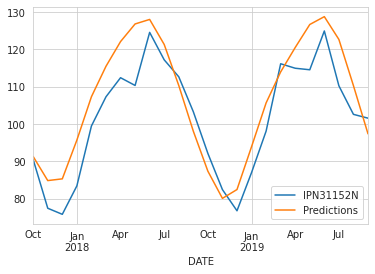

In [57]:
test.plot();

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [58]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [59]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,
                                scaled_full_data,
                                length=length,
                                batch_size=1)

In [60]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 14s 23ms/step - loss: 0.0179
Epoch 2/15
561/561 [==============================] - 13s 23ms/step - loss: 0.0069
Epoch 3/15
561/561 [==============================] - 14s 25ms/step - loss: 0.0054
Epoch 4/15
561/561 [==============================] - 13s 23ms/step - loss: 0.0045
Epoch 5/15
561/561 [==============================] - 13s 22ms/step - loss: 0.0042
Epoch 6/15
561/561 [==============================] - 12s 22ms/step - loss: 0.0034
Epoch 7/15
561/561 [==============================] - 12s 22ms/step - loss: 0.0032
Epoch 8/15
561/561 [==============================] - 13s 23ms/step - loss: 0.0030
Epoch 9/15
561/561 [==============================] - 13s 22ms/step - loss: 0.0033
Epoch 10/15
561/561 [==============================] - 12s 22ms/step - loss: 0.0028
Epoch 11/15
561/561 [==============================] - 12s 22ms/step - loss: 0.0030
Epoch 12/15
561/561 [==============================] - 12s 22ms/step - loss: 0.0028
E

In [61]:
scaled_full_data.shape

(573, 1)

In [62]:
scaled_full_data[-length:].shape

(12, 1)

In [63]:
forecast = []
# Replace periods with whatever forecast length you want

periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]],
                              axis=1)

In [64]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 94.94100289],
       [ 91.80851805],
       [ 92.9916412 ],
       [100.10273628],
       [110.56696919],
       [119.9446948 ],
       [126.33060335],
       [130.33762664],
       [130.67703415],
       [124.80806859],
       [117.17371925],
       [109.63097362]])

In [65]:
forecast_index = pd.date_range(start='2019-10-01', periods=periods, freq='MS')
forecast_index 

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [66]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,94.941
2019-11-01,91.809
2019-12-01,92.992
2020-01-01,100.103
2020-02-01,110.567
2020-03-01,119.945
2020-04-01,126.331
2020-05-01,130.338
2020-06-01,130.677
2020-07-01,124.808


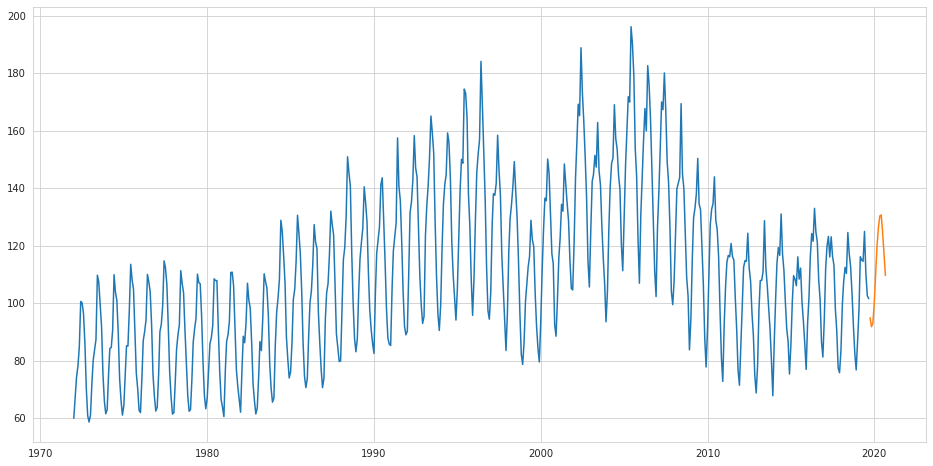

In [67]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['IPN31152N'])
plt.plot(forecast_df.index, forecast_df['Forecast']);
#plt.plot(forecast_index, forecast)

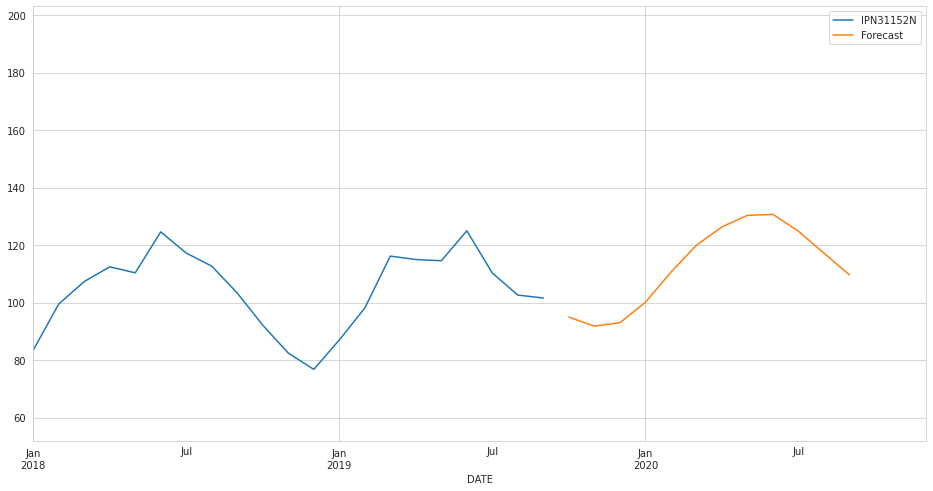

In [68]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01');

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___